In [1]:
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV, RFE
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')

/home/camila/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# load train, test, and dev sets
data_x = np.load('data_x.npy')
data_y = np.load('data_y.npy')

In [3]:
X_data, X_test, y_data, y_test = train_test_split(data_x, data_y, test_size=0.15, random_state=7)
X_train, X_dev, y_train, y_dev = train_test_split(X_data, y_data, test_size=0.15, random_state=7)

In [4]:
# pre-processing data: transforming each feature to have zero mean and unit variance. To avoid risk analysis
# being skewed by certain features dominating the variance.
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_dev = scaler.transform(X_dev)

In [5]:
lr_clf = linear_model.Ridge(alpha=0.5).fit(X_train, np.ravel(y_train))
lr_rfecv=RFECV(estimator=lr_clf, step=1, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
lr_rfecv.fit(X_train, np.ravel(y_train))
print("Optimal number of features : %d" % lr_rfecv.n_features_)

Optimal number of features : 67


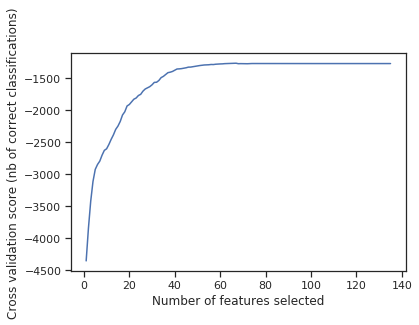

In [6]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(lr_rfecv.grid_scores_) + 1), lr_rfecv.grid_scores_)
plt.show()

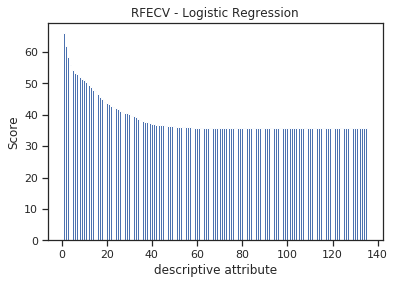

In [7]:
x = np.linspace(1, 135, 135)
plt.bar(x, np.sqrt(np.abs(lr_rfecv.grid_scores_)), color=sns.color_palette()[0])
plt.title('RFECV - Logistic Regression')
plt.xlabel('descriptive attribute')
plt.ylabel('Score')
plt.savefig('RFECV-LogisticRegession.svg')
plt.show()

In [8]:
rf_clf = RandomForestRegressor(n_estimators=100, oob_score=False, max_depth=15).fit(X_train, np.ravel(y_train))
rf_rfecv=RFECV(estimator=rf_clf, step=1, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
rf_rfecv.fit(X_train, np.ravel(y_train))
print("Optimal number of features : %d" % rf_rfecv.n_features_)

Optimal number of features : 86


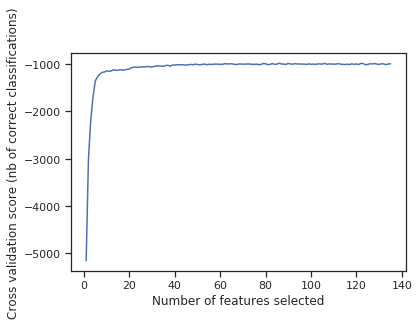

In [9]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rf_rfecv.grid_scores_) + 1), rf_rfecv.grid_scores_)
plt.show()

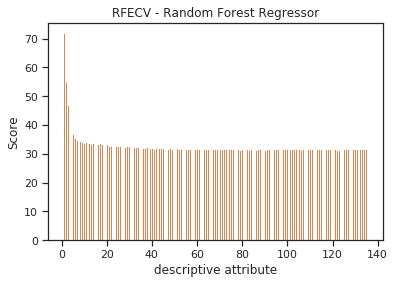

In [10]:
x = np.linspace(1, 135, 135)
plt.bar(x, np.sqrt(np.abs(rf_rfecv.grid_scores_)), color=sns.color_palette()[1])
plt.title('RFECV - Random Forest Regressor')
plt.xlabel('descriptive attribute')
plt.ylabel('Score')
plt.savefig('RFECV-RandomForestRegressor.svg')
plt.show()